# Data modeling in Pandas

## Learning objectives

This notebook is designed to give users an introduction to: 

- Importing files using Pandas

- Dataset inspection and manipulation

- Normalization, imputing missing values and data transformations

- Descriptive statistics

- Dimensionality reduction

- Clustering

- Principal component analysis

- Simple data visualization

**Users will after this notebook be able to:**

- Demonstrate a basic use of the Pandas data handling library

- Handle importing and processing protein expression level data

- Generate dataset statistics and show correlation heatmaps

- Generate simple data visualization graphs

- Perform, visualize and explain principal component analysis

# Case study:
# Quantifying relative protein levels in malaria-infected mice

<a href="img/malaria_paper.png"><center> <img src="img/malaria_paper.png" alt="Drawing" style="width: 600px;"/> <center><a/>



**Paper: Tiberti, N et. al. Exploring experimental cerebral malaria pathogenesis through the characterisation of host-derived plasma microparticle protein content,  Scientific Reports (2016) https://www.nature.com/articles/srep37871**

**The aim of the study was to investigate which proteins were significantly over- or underexpressed between different malaria stage conditions of experimentally infected cerebral malaria in mice.**

Malaria is as severe infectious disease with significant morbidity and mortality. Though being widespread in many parts of the world, the complete disease mechanism is not understood.

This study investigated plasma protein levels (a proposed effector of malaria) in mouse strains under different stages of malaria infection, using qualitative and quantitative high-throughput mass spectrometry based proteomics.

The experiment used Tandem-Mass-Tagging Mass Spectrometry (TMT-MS) for quantification of proteome in Malaria infected mice. TMT-MS makes use of special isobaric chemical tags which allow for uniquely tagging multiple samples which can then be analyzed in a single run. The TMT-tagged peptides of each sample can then be used both to identify the original sample and for relative quantification of peptides to one another.

<a href="img/tmt_workflow.jpg"><center> <img src="img/tmt_workflow.jpg" alt="Drawing" style="width: 600px;"/> <center/><a/>

**Source: Planet Orbitrap, "Relative Quantitation". URL: https://planetorbitrap.com/tmt**

**Read more on Tandem-Mass-Tag quantitation MS: https://www.thermofisher.com/dk/en/home/industrial/mass-spectrometry/proteomics-protein-mass-spectrometry/proteomics-protein-mass-spectrometry-workflows/relative-quantitation/tmt-quantitation.html#how-tmt-works**

## Dataset description

Two parallel experiments were performed in the experiment, with 6 mice in each (12 in total). 

<a href="img/tmt_workflow.jpg"><center> <a href="img/module1_wf.jpg"><img src="img/module1_wf.jpg" alt="Drawing" style="width: 400px;"/> <center/><a/>


Each of the 2 experiments had:
- 2 mice with non-infected status (controls)
- 2 mice with day 3 post-infection (only sampled 3 days after infection)
- 2 mice with Experimental Cerebral Malaria stage (ECM) day 8 (only sampled 8 days after infection upon evidence of ECM)

The dataset consists of in total 12 samples and the relative quantification levels of 748 proteins expressed log base 2 format. Not all proteins have quantified levels in all samples.


## Library import

Below we will import a series of libraries which will be used to run the code we will need for the analysis of our protein quantification dataset

In [1]:
# Data science libraries
import pandas as pd
import numpy as np
from sklearn import *

# Plotting libraries
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns

# Custom module for checking answers
sys.path.insert(0, "/biodatascience_notebooks/software/CheckAnswer")
from CheckModuleAnswers import *

# This is a custom script which gives intended coloring to cells in this notebook
from scripts.noteStyle import set_styles, background
set_styles()

Additionally the [Jupyter](https://ipython.readthedocs.io/en/stable/interactive/magics.html) [Magics](https://towardsdatascience.com/the-top-5-magic-commands-for-jupyter-notebooks-2bf0c5ae4bb8) commands below will allow us to show matplotlib graphs inside jupyter notebook, and make sure that if we change any of our scripts that we will always run the latest version of the script.

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
#Show matplotlib graphs directly in jupyter notebook
# Allow reloading of scripts
# Automatically reload scripts if they change

## Color coding

## Importing data in Pandas

__The dataset can be easily imported into a Pandas DataFrame using the read_csv method__

Pandas is a python library that provides easy-to-use data structures as well as data preprocessing and analysis methods. 
Pandas is mostly known for it's DataFrame structure for tabular data (similar to native dataframes in R). 
More information on the Pandas project can be found on: https://pandas.pydata.org.

A quick tutorial on using Pandas can be found here: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

#### Reading in tabular data from files

To import data Pandas provide a range of import methods for different data formats. 
In this example, the data is provided as a comma separated CSV file. Thus, we use the **read_csv** method which can read any comma (or other character) separated file.

**read_csv** comes with a variety of arguments, to appropriately import any csv file.

To see the available parameters, use **shift + tab** after the entered command

Most common parameters:
- filepath_or_buffer : string specifying the path to the data. 
- sep : string specifying the separator used. Default is "," but also "\t" (tab) and ";" is common. 
- header : integer specifying the row number used as column names (e.g. 0). 
- index_col : integer specifying the column number used as column names (e.g. 0). 
- decimal : string specifying decimal point character. Default "." (while "," is sometimes used in Scandinavia)

In [3]:
#Try to see the available commands using shift + tab, from inside the parentheses
#Note that this might take a while if the kernel is slow

In [4]:
df_raw = pd.read_csv("data/Malaria.csv", index_col = 0)

Note:
    
Almost everything in Python is zero indexed, meaning items start with a position of 0 instead of 1. Therefor index_col = 0 means use the first column as the index column.

Other alternatives to **read_csv** are **read_table**, **read_excel** **read_sql** and more ... (See https://elitedatascience.com/python-cheat-sheet).

While **pd.read_csv** reads in a file, **pd.to_csv** saves a dataframe as a file.

A whole or truncated view of the dataframe can be seen below:

In [5]:
df_raw

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.pi.Sample1,Sample.4.d3.pi.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample 1\nECM\nSample2,Sample 2\nECM\nSample2,Sample 3\nNI\nSample2,Sample 4\nNI\nSample2,Sample 5\nd3 pi\nSample2,Sample 6\nd3 pi\nSample2
A2A8L1,0.030023,0.255059,0.105955,-0.045645,-0.110047,-0.235346,0.396041,-3.631490,0.960442,0.816278,0.933976,0.524753
"A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7",-0.175916,-0.249753,-0.211482,-0.098306,0.285241,0.450215,-0.074134,0.887562,-0.481753,0.174177,-0.435210,-0.070642
"A2BIM8, B5X0G2, P02762, P04938",0.022319,-0.195931,-0.192663,-0.166054,0.368278,0.164051,0.066875,-0.020412,0.285260,-0.533405,0.214600,-0.012918
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.243200,0.037658,-0.251572,0.136858,0.106330,0.213925,-0.576792,0.745219,-0.058964,-0.113433,-0.094399,0.098368
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.739940,0.421966,0.077114,0.616292,-0.546514,-1.308798,-1.180796,-0.647811,1.255490,-0.035059,-0.616863,1.225039
...,...,...,...,...,...,...,...,...,...,...,...,...
Q63918,NaN,NaN,NaN,NaN,NaN,NaN,-0.187021,-0.084300,0.366505,0.400013,-0.068991,-0.426207
Q8CG16,NaN,NaN,NaN,NaN,NaN,NaN,-0.281706,-0.199044,0.378822,-0.045821,0.221614,-0.073865
Q9CQI6,NaN,NaN,NaN,NaN,NaN,NaN,-0.006262,0.601181,-0.039100,0.050765,-0.303919,-0.302665
Q8R146,NaN,NaN,NaN,NaN,NaN,NaN,-0.166520,0.587835,-0.055273,0.177209,-0.449705,-0.093546


### Dataframe summary commands

We can inspect the data using the DataFrame attribute '**shape**'.

'**.shape*' here returns a tuple in the format (#rows, #columns). 

In [6]:
shape = df_raw.shape
print("Dataset has", shape[0], "features from", shape[1], "samples")
shape

Dataset has 748 features from 12 samples


(748, 12)

An summary of the **DataFrame** object can be found using **.describe**.

This includes the number of unique values per column (feature), and each column´s mean, standard deviation and percentiles.

In [7]:
df_raw.describe()

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.pi.Sample1,Sample.4.d3.pi.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample 1\nECM\nSample2,Sample 2\nECM\nSample2,Sample 3\nNI\nSample2,Sample 4\nNI\nSample2,Sample 5\nd3 pi\nSample2,Sample 6\nd3 pi\nSample2
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,0.018741,-0.096846,-0.136090,-0.186912,0.257273,0.143834,-0.039733,0.433572,-0.141263,-0.023339,-0.184807,-0.044430
std,0.352807,0.242460,0.316248,0.349886,0.561700,0.484882,0.387100,0.897728,0.498972,0.265459,0.425344,0.285929
min,-1.226488,-1.090018,-1.698366,-1.772834,-1.461867,-1.421203,-1.180796,-3.631490,-2.903402,-0.772762,-1.576109,-0.963776
25%,-0.182524,-0.249135,-0.344550,-0.399042,-0.145712,-0.195306,-0.242904,-0.220424,-0.431201,-0.185618,-0.459229,-0.223822
50%,-0.020263,-0.116964,-0.148311,-0.202649,0.255479,0.132509,-0.111954,0.415333,-0.129233,-0.045670,-0.211429,-0.076210
75%,0.154793,0.045542,0.065655,0.024667,0.606388,0.455201,0.065979,1.163893,0.134527,0.115044,0.079249,0.095432
max,1.687239,0.676707,1.846544,0.846193,2.138143,2.338790,1.924148,2.752643,2.082204,1.522205,1.447687,1.225039


In [8]:
df_raw.nunique() #Unique values per column

Sample.1.NI.Sample1         591
Sample.2.NI.Sample1         591
Sample.3.d3.pi.Sample1      591
Sample.4.d3.pi.Sample1      591
Sample.5.ECM.Sample1        591
Sample.6.ECM.Sample1        591
Sample 1\nECM\nSample2      636
Sample 2\nECM\nSample2      636
Sample 3\nNI\nSample2       636
Sample 4\nNI\nSample2       636
Sample 5\nd3 pi\nSample2    636
Sample 6\nd3 pi\nSample2    636
dtype: int64

In [9]:
df_raw.corr() #Correlation between each sample and each other sample

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.pi.Sample1,Sample.4.d3.pi.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample 1\nECM\nSample2,Sample 2\nECM\nSample2,Sample 3\nNI\nSample2,Sample 4\nNI\nSample2,Sample 5\nd3 pi\nSample2,Sample 6\nd3 pi\nSample2
Sample.1.NI.Sample1,1.000000,0.337269,-0.019516,0.203421,-0.499222,-0.452005,-0.437800,-0.193705,0.259209,0.430271,-0.121997,0.550231
Sample.2.NI.Sample1,0.337269,1.000000,0.640982,0.724954,-0.788059,-0.773708,-0.278472,-0.588729,0.480469,0.355243,0.405743,0.495142
Sample.3.d3.pi.Sample1,-0.019516,0.640982,1.000000,0.644084,-0.653502,-0.666261,-0.192783,-0.535438,0.373365,0.267635,0.547784,0.268700
Sample.4.d3.pi.Sample1,0.203421,0.724954,0.644084,1.000000,-0.785637,-0.742085,-0.234144,-0.547865,0.387534,0.337208,0.473519,0.381605
Sample.5.ECM.Sample1,-0.499222,-0.788059,-0.653502,-0.785637,1.000000,0.592005,0.337964,0.516322,-0.402954,-0.448625,-0.304762,-0.540100
Sample.6.ECM.Sample1,-0.452005,-0.773708,-0.666261,-0.742085,0.592005,1.000000,0.377500,0.587589,-0.493576,-0.407218,-0.449919,-0.497314
Sample 1\nECM\nSample2,-0.437800,-0.278472,-0.192783,-0.234144,0.337964,0.377500,1.000000,-0.253582,-0.052574,-0.375557,0.193137,-0.404558
Sample 2\nECM\nSample2,-0.193705,-0.588729,-0.535438,-0.547865,0.516322,0.587589,-0.253582,1.000000,-0.718901,-0.349158,-0.618427,-0.297708
Sample 3\nNI\nSample2,0.259209,0.480469,0.373365,0.387534,-0.402954,-0.493576,-0.052574,-0.718901,1.000000,0.216651,0.178114,0.117108
Sample 4\nNI\nSample2,0.430271,0.355243,0.267635,0.337208,-0.448625,-0.407218,-0.375557,-0.349158,0.216651,1.000000,-0.064099,0.393555


#### List of data inspection commands to try out:
**Reference: Python Cheat Sheet for Data Science, elitedatascience.com,
URL: https://elitedatascience.com/python-cheat-sheet, November 2019.**

In [10]:
df_raw.iloc[0].value_counts()

 0.030023    1
 0.933976    1
 0.396041    1
 0.105955    1
-3.631490    1
 0.960442    1
-0.045645    1
 0.816278    1
-0.110047    1
 0.524753    1
 0.255059    1
-0.235346    1
Name: A2A8L1, dtype: int64

Try exploring the different pandas methods on your df_raw dataframe.

Question 1: </b>What is the lowest value in sample  “Sample.3.d3.pi.Sample1”?

In [11]:
#Please fill in your answer if you want to have it corrected
check_answer_module1(question='1', 
                     answer="")

Better luck next time.
your answer was : 


## Data inspection

A portion of the dataset can be inspected using the Pandas **.head** method:

The method prints the n first rows of the DataFrame, as such:

In [12]:
df_raw.head(n = 5)

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.pi.Sample1,Sample.4.d3.pi.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample 1\nECM\nSample2,Sample 2\nECM\nSample2,Sample 3\nNI\nSample2,Sample 4\nNI\nSample2,Sample 5\nd3 pi\nSample2,Sample 6\nd3 pi\nSample2
A2A8L1,0.030023,0.255059,0.105955,-0.045645,-0.110047,-0.235346,0.396041,-3.631490,0.960442,0.816278,0.933976,0.524753
"A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7",-0.175916,-0.249753,-0.211482,-0.098306,0.285241,0.450215,-0.074134,0.887562,-0.481753,0.174177,-0.435210,-0.070642
"A2BIM8, B5X0G2, P02762, P04938",0.022319,-0.195931,-0.192663,-0.166054,0.368278,0.164051,0.066875,-0.020412,0.285260,-0.533405,0.214600,-0.012918
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.243200,0.037658,-0.251572,0.136858,0.106330,0.213925,-0.576792,0.745219,-0.058964,-0.113433,-0.094399,0.098368
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.739940,0.421966,0.077114,0.616292,-0.546514,-1.308798,-1.180796,-0.647811,1.255490,-0.035059,-0.616863,1.225039


As we can see from the data, protein accession numbers are ordered along the rows, and sample names along the columns. Protein names are given as UniprotKB identifiers.

DataFrames columns can directly be sliced on columns using the square brackets []. 

df_raw[['column_name1', 'column_name2']]

This way is though very restricted, therefore we recomend using pandas .loc and .iloc

#### Accessing dataframe items using .iloc and .loc for

**.iloc** - accesses items by their **position** (integer number)

**.loc** -- accesses items using their **name** (usually for text or column names but sometimes also integer numbers)

...

**df.iloc[[rows], [columns]]**

.iloc accepts:
- An integer, eg. (7).
- A list or array of integers, eg. [1, 2, 4].
- A slice object with integers, eg. 1:5
- A boolean array of the same length as the axis


**df.loc[[rownames], [columnnames]]**

.loc accepts:
- A single label integer or string, eg. 'a'
- A list or array of labels, eg. ['a', 'b', 'c'].
- A slice object with labels, eg. 'a':'f'.
- A boolean array of the same length as the axis

Let´s try to get the first 5 rows and first 5 columns by two equivalent methods

In [13]:
df_raw.iloc[0:5, 0:5] #Using a slice object and .iloc

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.pi.Sample1,Sample.4.d3.pi.Sample1,Sample.5.ECM.Sample1
A2A8L1,0.030023,0.255059,0.105955,-0.045645,-0.110047
"A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7",-0.175916,-0.249753,-0.211482,-0.098306,0.285241
"A2BIM8, B5X0G2, P02762, P04938",0.022319,-0.195931,-0.192663,-0.166054,0.368278
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.243200,0.037658,-0.251572,0.136858,0.106330
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.739940,0.421966,0.077114,0.616292,-0.546514


In [14]:
df_raw.iloc[[0,1,2,3,4], [0,1,2,3,4]] #Using a list and .iloc

,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.pi.Sample1,Sample.4.d3.pi.Sample1,Sample.5.ECM.Sample1
A2A8L1,0.030023,0.255059,0.105955,-0.045645,-0.110047
"A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7",-0.175916,-0.249753,-0.211482,-0.098306,0.285241
"A2BIM8, B5X0G2, P02762, P04938",0.022319,-0.195931,-0.192663,-0.166054,0.368278
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.243200,0.037658,-0.251572,0.136858,0.106330
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.739940,0.421966,0.077114,0.616292,-0.546514


We can also access individual samples/columns using the column names using the following two methods:

In [15]:
df_raw.loc[:, "Sample.1.NI.Sample1"] #Using names and .loc

A2A8L1                                                            0.030023
A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7   -0.175916
A2BIM8, B5X0G2, P02762, P04938                                    0.022319
A2BIM8, B5X0G2, P02762, P04938, P04939, P11589                   -0.243200
A2BIM8, B5X0G2, P02762, P04938, P11588                            0.739940
                                                                    ...   
Q63918                                                                 NaN
Q8CG16                                                                 NaN
Q9CQI6                                                                 NaN
Q8R146                                                                 NaN
P47753, P47754                                                         NaN
Name: Sample.1.NI.Sample1, Length: 748, dtype: float64

In [16]:
df_raw["Sample.1.NI.Sample1"] #Access column names directly

A2A8L1                                                            0.030023
A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7   -0.175916
A2BIM8, B5X0G2, P02762, P04938                                    0.022319
A2BIM8, B5X0G2, P02762, P04938, P04939, P11589                   -0.243200
A2BIM8, B5X0G2, P02762, P04938, P11588                            0.739940
                                                                    ...   
Q63918                                                                 NaN
Q8CG16                                                                 NaN
Q9CQI6                                                                 NaN
Q8R146                                                                 NaN
P47753, P47754                                                         NaN
Name: Sample.1.NI.Sample1, Length: 748, dtype: float64

Note: Confusing the accessing methods, which comes first of rows and column, and mixing up index / column NAMES for LOCATIONS can lead to bizarre results when this does not immediately return an error!
  

Some helpful tips:
- Rows always come before columns
- To specify multiple rows or columns use:
    - a slice: [1:5, :]
    - list or pd.Series: [1,2,3,4]
- If in doubt, .iloc will always return the absolute integer position(s)
- To quickly access named columns:
    - df["column_name"]
    - df[["column_name1", "column_name2"]]

Question 2: What is the 35th protein id?
Hint: Python indexes start at 0



In [17]:
check_answer_module1(question='2', 
                     answer="")

Please try again.
your answer was : 


__Lets check out the columns and index names__

We can access the column and row names using the column and index attributes. 

In [18]:
df_raw.columns

Index(['Sample.1.NI.Sample1', 'Sample.2.NI.Sample1', 'Sample.3.d3.pi.Sample1',
       'Sample.4.d3.pi.Sample1', 'Sample.5.ECM.Sample1',
       'Sample.6.ECM.Sample1', 'Sample 1\nECM\nSample2',
       'Sample 2\nECM\nSample2', 'Sample 3\nNI\nSample2',
       'Sample 4\nNI\nSample2', 'Sample 5\nd3 pi\nSample2',
       'Sample 6\nd3 pi\nSample2'],
      dtype='object')

In [19]:
df_raw.index

Index(['A2A8L1',
       'A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7',
       'A2BIM8, B5X0G2, P02762, P04938',
       'A2BIM8, B5X0G2, P02762, P04938, P04939, P11589',
       'A2BIM8, B5X0G2, P02762, P04938, P11588',
       'A2BIM8, B5X0G2, P02762, P04938, P11588, P11589',
       'A2BIM8, B5X0G2, P02762, P04938, P11588, P11589, P11591',
       'A2BIM8, B5X0G2, P02762, P04938, P11588, P11589, P11591, Q5FW60',
       'A2BIM8, P02762, P04938, P11588, P11589', 'A3KGS3',
       ...
       'Q9R111', 'P68510', 'P50446', 'Q9Z0M6', 'P70336', 'Q63918', 'Q8CG16',
       'Q9CQI6', 'Q8R146', 'P47753, P47754'],
      dtype='object', length=748)

Question 3: Now try accessing sample name (.columns) using the square brackets []. What sample name is in column 7? 

In [20]:
check_answer_module1(question='3', 
                     answer="")


Please try again.
your answer was : 


New columns names can be manually assigned or replaced by assinging an array of strings or integers to **df.columns** or **df.index**.

Here we use a shortened manually curated version of the author labels for simplicity.

#### Renaming column names

In [21]:
df_raw.columns = ["NI_1", "NI_2",
                 "D3_3", "D3_4",
                 "ECM_5", "ECM_6",
                 "ECM_11", "ECM_12",
                 "NI_7", "NI_8",
                 "D3_9", "D3_10"]

#### Re-ordering columns

In this dataset the columns are ordered by the batch they belong to. Instead we would like the samples to be binned by their treatment group, and appear in chronogical order, namely:

- Non-infected : NI
- Day 3 : D3
- Experimental cerebral malaria : ECM


In [22]:
#Let´s re-order the columns by accessing them in a specific order, and see what the new dataframe looks like
df_raw.loc[:, ["NI_1", "NI_2", "NI_7", "NI_8",
              "D3_3", "D3_4", "D3_9", "D3_10",
              "ECM_5", "ECM_6", "ECM_11", "ECM_12"]]

,NI_1,NI_2,NI_7,NI_8,D3_3,D3_4,D3_9,D3_10,ECM_5,ECM_6,ECM_11,ECM_12
A2A8L1,0.030023,0.255059,0.960442,0.816278,0.105955,-0.045645,0.933976,0.524753,-0.110047,-0.235346,0.396041,-3.631490
"A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7",-0.175916,-0.249753,-0.481753,0.174177,-0.211482,-0.098306,-0.435210,-0.070642,0.285241,0.450215,-0.074134,0.887562
"A2BIM8, B5X0G2, P02762, P04938",0.022319,-0.195931,0.285260,-0.533405,-0.192663,-0.166054,0.214600,-0.012918,0.368278,0.164051,0.066875,-0.020412
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.243200,0.037658,-0.058964,-0.113433,-0.251572,0.136858,-0.094399,0.098368,0.106330,0.213925,-0.576792,0.745219
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.739940,0.421966,1.255490,-0.035059,0.077114,0.616292,-0.616863,1.225039,-0.546514,-1.308798,-1.180796,-0.647811
...,...,...,...,...,...,...,...,...,...,...,...,...
Q63918,NaN,NaN,0.366505,0.400013,NaN,NaN,-0.068991,-0.426207,NaN,NaN,-0.187021,-0.084300
Q8CG16,NaN,NaN,0.378822,-0.045821,NaN,NaN,0.221614,-0.073865,NaN,NaN,-0.281706,-0.199044
Q9CQI6,NaN,NaN,-0.039100,0.050765,NaN,NaN,-0.303919,-0.302665,NaN,NaN,-0.006262,0.601181
Q8R146,NaN,NaN,-0.055273,0.177209,NaN,NaN,-0.449705,-0.093546,NaN,NaN,-0.166520,0.587835


To make this change permanent, we need to save this new view into a variable.
Let´s save it back to **df_raw**.

In [23]:
df_raw = df_raw.loc[:, ["NI_1", "NI_2", "NI_7", "NI_8",
              "D3_3", "D3_4", "D3_9", "D3_10",
              "ECM_5", "ECM_6", "ECM_11", "ECM_12"]]

To inspect the column ordering we can again check the columns attribute again

In [24]:
df_raw.columns

Index(['NI_1', 'NI_2', 'NI_7', 'NI_8', 'D3_3', 'D3_4', 'D3_9', 'D3_10',
       'ECM_5', 'ECM_6', 'ECM_11', 'ECM_12'],
      dtype='object')

__Subtask summary:__

So far we:
- Loaded the dataset using the Pandas module
- Inspected the dataframe
- Generated summary statistics
- Re-ordered the dataframe columns

## Removing mising values, normalizing and cleaning our data

In [25]:
df_raw.describe() #Summary of whole Dataframe

,NI_1,NI_2,NI_7,NI_8,D3_3,D3_4,D3_9,D3_10,ECM_5,ECM_6,ECM_11,ECM_12
count,591.000000,591.000000,636.000000,636.000000,591.000000,591.000000,636.000000,636.000000,591.000000,591.000000,636.000000,636.000000
mean,0.018741,-0.096846,-0.141263,-0.023339,-0.136090,-0.186912,-0.184807,-0.044430,0.257273,0.143834,-0.039733,0.433572
std,0.352807,0.242460,0.498972,0.265459,0.316248,0.349886,0.425344,0.285929,0.561700,0.484882,0.387100,0.897728
min,-1.226488,-1.090018,-2.903402,-0.772762,-1.698366,-1.772834,-1.576109,-0.963776,-1.461867,-1.421203,-1.180796,-3.631490
25%,-0.182524,-0.249135,-0.431201,-0.185618,-0.344550,-0.399042,-0.459229,-0.223822,-0.145712,-0.195306,-0.242904,-0.220424
50%,-0.020263,-0.116964,-0.129233,-0.045670,-0.148311,-0.202649,-0.211429,-0.076210,0.255479,0.132509,-0.111954,0.415333
75%,0.154793,0.045542,0.134527,0.115044,0.065655,0.024667,0.079249,0.095432,0.606388,0.455201,0.065979,1.163893
max,1.687239,0.676707,2.082204,1.522205,1.846544,0.846193,1.447687,1.225039,2.138143,2.338790,1.924148,2.752643


From the generated summary statistics, we can see that all samples from 'Sample1' run have lower count than 'Sample2'. We also see that the replicates have different means, minimums and maximums.

## Plotting in seaborn
We can also plot all the protein values per sample using the plotting library Seaborn and matplotlib.

Read more: https://seaborn.pydata.org/introduction.html



In order to make our analysis of the data easier, we will use Pandas´ **pd.melt** function. This will reshape our data for more computer-friendly analysis, and return a DataFrame with only two columns. One for the samples (**variable**) and one for the protein levels (sample **value**), as shown below:

In [26]:
pd.melt(df_raw)

,variable,value
0,NI_1,0.030023
1,NI_1,-0.175916
2,NI_1,0.022319
3,NI_1,-0.243200
4,NI_1,0.739940
...,...,...
8971,ECM_12,-0.084300
8972,ECM_12,-0.199044
8973,ECM_12,0.601181
8974,ECM_12,0.587835


#### Great! Now we can simply plot the distribution of values per sample:

Text(0, 0.5, 'Log2 Quantitative protein expression levels')

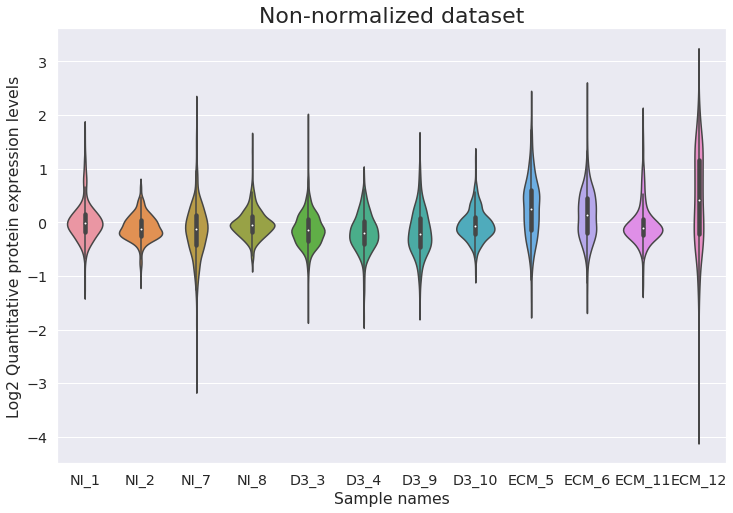

In [27]:
df = pd.melt(df_raw)

# Initialize plot
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize = (12,8))

# Graph violin plot
sns.violinplot(data = df, x = 'variable', y = 'value', ax = ax)

# Change plot settings
plt.title("Non-normalized dataset", fontsize = 22)
ax.set_xlabel("Sample names")
ax.set_ylabel("Log2 Quantitative protein expression levels")



When the samples are not normalized, it can make direct comparison between them difficult to interpret. Based on this, we can begin considering that the data needs to be normalized (put sample mean to 0 and variance to 1) in order to make comparisons between them equal. We will be doing this later.

#### Dealing with empty values in the dataset
Upon data generation, not all proteins may be observed in all samples. The general consensus is that this is due to technical limitations of the techniques and stochastic dropouts. Therefore, we assume that all proteins are expressed to some degree at any point in time. 


From a Data Science point of view, empty values are problematic as they do not represent any specific numerical value, and thus performing calculations on them is ambiguous.
    
Note: Common alternatives for dealing with empty values include:
    
- Removing row or column
- Setting to 0
- Setting to feature or sample mean or some other imputing method
- Setting to a special categorical value representing missing values


#### Finding empty values in the dataset

We can test for NA values in out DataFrame using the Pandas **.isna method**. 

**.isna** return as boolean DataFrame (True or False). Since True and False is represented as 1 and 0 respectively in Python, the total number of True statements can easily be counted. Here we count the number of NA's per sample using the Pandas **.sum** method.

Like the sum method, pandas also have other functions to generate descriptive statistics e.g. **.mean()**, **.median()** and **.std()**.

In [28]:
df_raw.isna().sum()

NI_1      157
NI_2      157
NI_7      112
NI_8      112
D3_3      157
D3_4      157
D3_9      112
D3_10     112
ECM_5     157
ECM_6     157
ECM_11    112
ECM_12    112
dtype: int64

Question 4: What is the mean number of NA values per sample in this dataset?

In [29]:
check_answer_module1(question='4', 
                     answer="")

You are so close, try again.
your answer was : 


We can also do the reverse: Get the total count of all proteins per sample that are NOT missing:

In [30]:
df_raw.notna().sum()

NI_1      591
NI_2      591
NI_7      636
NI_8      636
D3_3      591
D3_4      591
D3_9      636
D3_10     636
ECM_5     591
ECM_6     591
ECM_11    636
ECM_12    636
dtype: int64

One way to deal with NA values is to just remove them. Here we see that we have a lot of NA values and therefore we would have to remove a large portion of the data. This is undesirable as it would mean discarding an entire protein if any of the 12 samples have a missing value for that protein, meaning we´d potentially be throwing away a lot of good data as well.

**Let´s try dropping all rows (proteins) with at least 1 missing value, and see what happens:**


In [31]:
df_raw.dropna()

,NI_1,NI_2,NI_7,NI_8,D3_3,D3_4,D3_9,D3_10,ECM_5,ECM_6,ECM_11,ECM_12
A2A8L1,0.030023,0.255059,0.960442,0.816278,0.105955,-0.045645,0.933976,0.524753,-0.110047,-0.235346,0.396041,-3.631490
"A2AQ07, P68372, P99024, Q7TMM9, Q922F4, Q9CWF2, Q9D6F9, Q9ERD7",-0.175916,-0.249753,-0.481753,0.174177,-0.211482,-0.098306,-0.435210,-0.070642,0.285241,0.450215,-0.074134,0.887562
"A2BIM8, B5X0G2, P02762, P04938",0.022319,-0.195931,0.285260,-0.533405,-0.192663,-0.166054,0.214600,-0.012918,0.368278,0.164051,0.066875,-0.020412
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.243200,0.037658,-0.058964,-0.113433,-0.251572,0.136858,-0.094399,0.098368,0.106330,0.213925,-0.576792,0.745219
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.739940,0.421966,1.255490,-0.035059,0.077114,0.616292,-0.616863,1.225039,-0.546514,-1.308798,-1.180796,-0.647811
...,...,...,...,...,...,...,...,...,...,...,...,...
Q9WVA4,0.112719,-0.396774,-0.049299,0.056203,-0.387501,-0.149961,0.145984,-0.238364,0.385670,0.435847,-0.117934,0.203410
Q9Z126,-0.220367,-0.090344,1.339732,0.557239,0.799531,0.210439,-0.420985,-0.180021,-0.261854,-0.437405,-0.541925,-0.754040
Q9Z1R3,0.843102,0.313808,-0.145425,0.534150,-0.020243,0.459755,0.215962,0.557557,-1.364095,-0.232327,-0.891840,-0.270403
Q9Z2K1,0.744293,-0.230905,0.346441,-0.107369,-0.010773,-0.626418,-0.912998,0.329317,0.114466,0.009336,-0.238551,0.583160


In [32]:
df_raw.shape

(748, 12)

Our dataset has been reduced from 748 proteins to 479 proteins

In [33]:
(748 - 479) / 748

0.35962566844919786

We are effectively throwing away 36 % of our data, also discarding proteins even if a single sample was missing a value for that protein. This is greatly undesirable. Let´s investigate alternative strategies for dealing with missing values.

#### Mean imputation
Another way to deal with missing data is to impute it. 
Here we apply a simple mean imputation mehod, where any missing value is estimated to be the mean abundance of that protein across all samples. 

In real world problems, more advanced imputing methods are advised.

**Read more:**
- Will Badr, How to handle missing data, towardsdatascience.com, 2019: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
- Schmitt et al, A Comparison of Six Methods for Missing Data Imputation, Journal of Biometrics & Biostatistics, 2015: https://www.omicsonline.org/open-access/a-comparison-of-six-methods-for-missing-data-imputation-2155-6180-1000224.php?aid=54590



    
We can only recommend using Sci-kit learn´s Imputer to impute missing values. We have a choice of imputation strategy (mean, median or most frequent values) and to normalize based either on:

- row mean (protein level across samples, axis = 1)
- column mean (protein level based on all proteins in that sample, axis = 0) 

- Sklearn documentation for mean imputation: https://scikit-learn.org/stable/modules/impute.html#impute
    
    
But for transparency we implement the imputer using only pandas methods instead of using the sklearn implementation.

In [34]:
df_proc = df_raw.apply(lambda row: row.fillna(row.mean()), axis=1)

In [35]:
df_proc.isna().sum()

NI_1      0
NI_2      0
NI_7      0
NI_8      0
D3_3      0
D3_4      0
D3_9      0
D3_10     0
ECM_5     0
ECM_6     0
ECM_11    0
ECM_12    0
dtype: int64

### Great!
**We now have no missing values and the NA's (missing values) have been imputed, such that they don't contribute or bias our observed variation.**

#### Visualizing our non-normalized data

Let´s compare the distribution of protein expression (log 2 changes)

Text(0, 0.5, 'Log2 Quantitative protein expression levels')

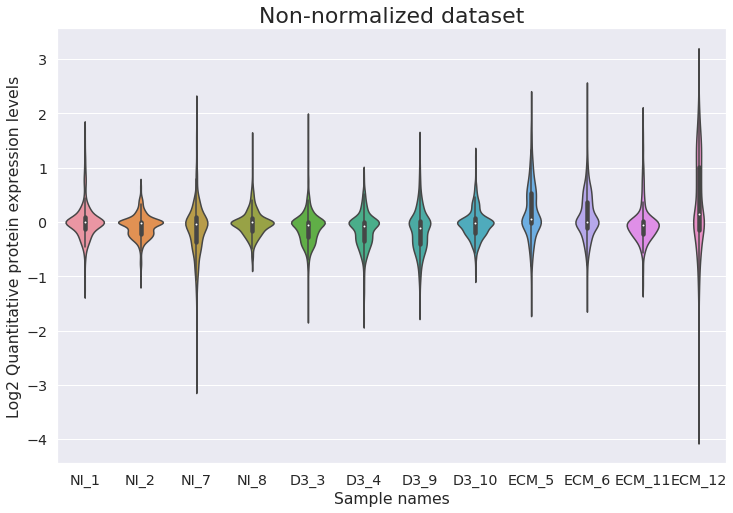

In [36]:
df = pd.melt(df_proc)

#Initialize plot
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize = (12,8))

# Graph violinplot
sns.violinplot(data = df, x = 'variable', y = 'value', ax = ax)

# Change plot settings
plt.title("Non-normalized dataset", fontsize = 22)
ax.set_xlabel("Sample names")
ax.set_ylabel("Log2 Quantitative protein expression levels")

### Normalizing data

Data normalization is a critical part of biological data science. Here the aim is to isolate the biological variation, by removing technical variation.

Here we are most concerned about samples with abnormal dynamic range and mean. 

Technical variation or systematic errors can originate from many different sources e.g. small variations in sample size/volume and reagent amount between samples. 

The ratinale for our normalization strategy is as follow: 
Assuming two given samples are equally big, they should contain the same ammount of protein. Hence, we can set the means of both samples to zero. To acocunt for the dynamic range of different peptides eg. one peptide being expressed in the range of .1 - 1, and another being expressed in the expressed at the dynamic range of 10 - 100, we scale the expression of each peptide to unit variance over all samples. 

To normalize the data we use the scikit-learn standardScaler.

The standardScaler purely centers each column around 0 and scales to unit variance using the formula:

<center> <span style="font-size:1.5em;">$x_{scaled} = \frac{x-\mu}{\sigma}$</span> </center>

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = pd.DataFrame(data = scaler.fit_transform(df_proc),
                                                 index = df_proc.index, 
                                                 columns = df_proc.columns)

In [38]:
df_scaled.describe()

,NI_1,NI_2,NI_7,NI_8,D3_3,D3_4,D3_9,D3_10,ECM_5,ECM_6,ECM_11,ECM_12
count,7.480000e+02,7.480000e+02,7.480000e+02,748.000000,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02
mean,6.530724e-18,2.849770e-17,-4.749617e-18,0.000000,-1.899847e-17,3.799694e-17,9.499234e-18,4.749617e-18,-3.799694e-17,5.699541e-17,1.424885e-17,-2.374809e-17
std,1.000669e+00,1.000669e+00,1.000669e+00,1.000669,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00
min,-3.960359e+00,-4.629603e+00,-6.017991e+00,-3.076537,-5.556867e+00,-5.079722e+00,-3.570558e+00,-3.508579e+00,-3.266618e+00,-3.531612e+00,-3.213406e+00,-4.753664e+00
25%,-4.746239e-01,-6.196147e-01,-5.529167e-01,-0.563579,-6.081456e-01,-6.098046e-01,-6.454584e-01,-5.994050e-01,-4.405170e-01,-5.183365e-01,-5.248200e-01,-6.047573e-01
50%,-4.724347e-02,2.293904e-01,1.753839e-01,0.055862,1.626206e-01,2.037054e-01,1.049833e-01,7.523079e-02,-2.852217e-01,-2.614898e-01,-8.494349e-02,-2.599424e-01
75%,2.567040e-01,3.878672e-01,4.621955e-01,0.357402,3.755904e-01,4.616039e-01,4.506196e-01,4.044310e-01,6.437455e-01,5.714396e-01,1.395351e-01,7.690351e-01
max,5.335901e+00,3.440686e+00,4.761814e+00,6.301047,6.825636e+00,3.106540e+00,4.038207e+00,4.784771e+00,3.795763e+00,5.119956e+00,5.485232e+00,2.833073e+00


Note how the means are now centered around 0. The tiny values above/below zero are artifacts of the **np.float64** floating point precision not being able to specify the 0 values precisely enough.

Read more about Numpy data types: https://numpy.org/devdocs/user/basics.types.html

Text(0.5, 1.0, 'Normalized dataset')

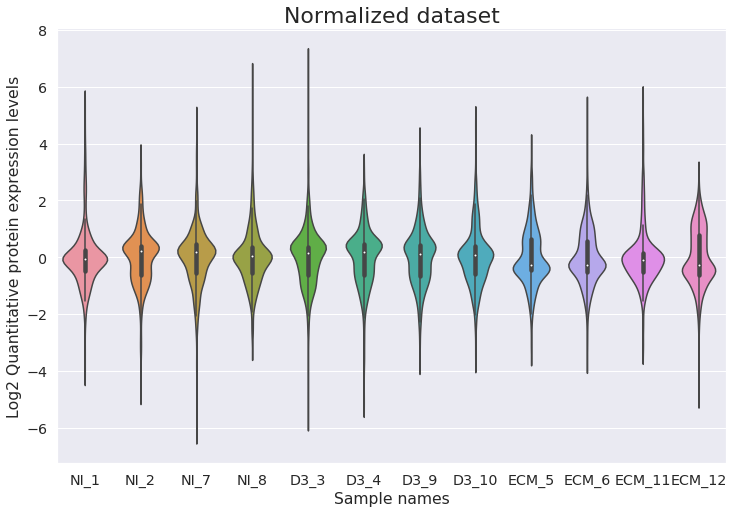

In [39]:
df = pd.melt(df_scaled)

sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize = (12,8))

sns.violinplot(data = df, x = 'variable', y = 'value', ax = ax)

ax.set_xlabel("Sample names")
ax.set_ylabel("Log2 Quantitative protein expression levels")
plt.title("Normalized dataset", fontsize = 22)

__Subtask summary:__

So far we:
- Imputed missing values using simple mean imputation
- Normalized all samples to mean zero and unit variance
- Generated summary statistics and descriptive plots of data quality

#### Sample correlation heatmap using Spearman correlation

It would be reasonable to expect samples from early and late infection to be very different. To investigate this we calculate a [Spearman correlation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) between the samples. 



- Samples that have similar protein quantitation levels, will show a positive correlation value up to 1.0
- Samples that are dissimilar will show a negative correlations up to -1.0
- A pearson correlation close to 0 means the samples have low or no correlation with one another.

<a href="img/corr.jpg"><center> <img src="img/corr.jpg" alt="Drawing" style="width: 400px;"/> <center/><a/>
    
Reference: Haroon D. (2017) Regression. In: Python Machine Learning Case Studies, pp 45-94. Apress, Berkeley, CA URL: https://doi.org/10.1007/978-1-4842-2823-4_2


Firstly, we generate a plot of the correlations using **corrplot**. Here the colors indicate the correlation value, and the size of the square indicate the magnitude of the (absolute) correlation.

In [40]:
import sys
sys.path.insert(0, "/biodatascience_notebooks/software/heatmap/")
from heatmap import heatmap, corrplot

# Python code and Jupyter notebook for an improved heatmap implementation using Matplotlib and Seaborn.
# Code avalible at: https://github.com/drazenz/heatmap
#Described in: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# by: Drazen Zaric, 2019

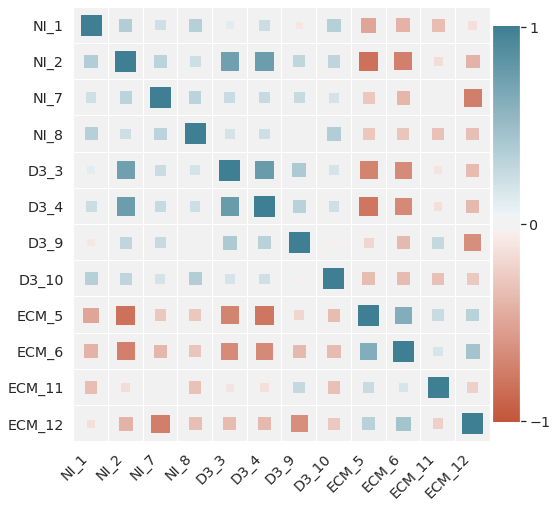

In [41]:
fig, ax = plt.subplots(figsize = (8,8))

corrplot(df_proc.corr(method = 'spearman'), size_scale = 400)

This nicely illustrates that non-infected and day3 infection are very different from ECM.

Though this looks very nice, we would like to cluster the samples too. For this we use the seaborn clustermap function.

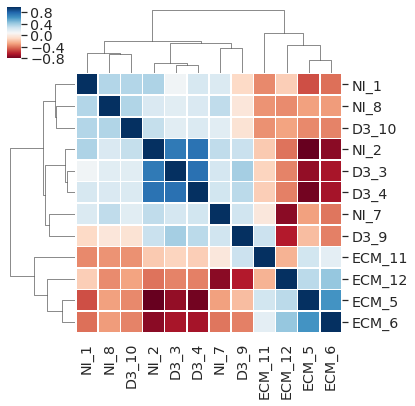

In [42]:
#Calculate pearson correlation
correlations = df_proc.corr(method='spearman')

#Plot heatmap
sns.clustermap(correlations, method = "average", metric = "euclidean",
               figsize = (6, 6), linewidth=0.5, cmap = 'RdBu')

The resulting heatmap (**clustermap**) looks in many ways very similar to the **corrplot** above. By default, seaborn clustermap clusters the columns and rows using hierachical clustering. From this, we see that non-infected and day 3 post infection forms one cluster, and ECM forms a second cluster.

Exercise: What 2 samples are the most similar?

## PCA analysis

PCA is a dimensionality reduction method to reduce the dimensionality (number of features, or in this case, proteins) of large datasets while maintaining most of the variation. This is achieved by calculating which features (proteins) vary the most across samples, and defining new, abstract features called principal components which give a high weight to those features. This way, one is often able to describe up to 90 % or more of the dataset variation with only a few principal components, instead of needing the entire dataset.

The first principal component thus describes the largest source of variation. The second, second most variation and so forth until N-1 components. Only working with largest axis of variations reduces the redundancy and noise in the data. It also becomes a lot easier to compute on.

**Read more:** Intuition for Principal Component Analysis (PCA), https://blog.ephorie.de/intuition-for-principal-component-analysis-pca

#### Intuition for PCA

One funny but intuitive application of PCA by Learning Machines (*) is the reduction applied to this 3D teapot. Imagine that each large point (sphere) is represented by an x, y and z coordinate. That is, the dataset samples (points in 3D space) are represented by 3 features.

<img src="img/teapot_in_3D.png" alt="Drawing" style="width: 400px;"/>

Imagine manually trying to rotate a 3D representation of this teapot until you get the 3D to 2D snapshot or view representing the highest possible variation in each direction. That view becomes the PCA view you reach after completing your principal component analysis and plotting that points. All the points are now only represented by their point in this 2 dimensional space.

In other words, by applying PCA, the teapot is rotated to maximize the variation / information in a 2D plane. This retains the highest amount of information in the dataset, while reducing its size considerably.

<img src="img/teapot_in_2D.png" alt="Drawing" style="width: 400px;"/>

Images and reference (*):
Learning Machines, 2018: https://blog.ephorie.de/intuition-for-principal-component-analysis-pca


#### Let´s try to run a PCA analysis on our 12 samples and 748 proteins, and see what the principal components can tell us

In [43]:
from sklearn.decomposition import PCA

df = df_scaled.copy()

#Try changing the number of components to include from 2 to other values
n_components = 2

#Define the number of components we want
pca = PCA(n_components=n_components)

#Extract principal component 1 and 2 values for each of our samples
principalComponents = pca.fit_transform(df.T)
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ["PC1", "PC2"])

#Explained variance
pca_explained_variance = round(sum(pca.explained_variance_ratio_[0:n_components])*100, 2)
print("The top", n_components, "principal components explain", pca_explained_variance, " % of the variance")

The top 2 principal components explain 58.41  % of the variance


In [44]:
principalDf

,PC1,PC2
0,-8.161876,-15.744299
1,-19.090771,0.412646
2,-8.461706,7.017049
3,-7.986543,-10.827180
4,-15.526944,6.735909
5,-18.070550,2.680872
6,-5.511229,18.446386
7,-9.391711,-13.046400
8,27.995030,2.313088
9,28.855643,-1.169171


#### Plotting principal components

These 2 components can be used as an x and y-axis in a coordinate system. As such, we can look for grouping of samples in this principal component or latent space. For illustration, lets color and annotate the points according to their treatment stage. This is done by adding treatment information per sample and specifying a color palette to use.

In [45]:
# Adding group label for each sample
df = principalDf
df["group"] = df_scaled.columns

x = df.iloc[:, 0] #First column, first PC
y = df.iloc[:, 1] #Second column, second PC

#Set coloring for our groups by the order of our columns
groups = ["NI"]*4 + ["D3"]*4 + ["ECM"]*4
colors = ['#0D76BF', '#00cc96', "#EF553B"]

In [46]:
df

,PC1,PC2,group
0,-8.161876,-15.744299,NI_1
1,-19.090771,0.412646,NI_2
2,-8.461706,7.017049,NI_7
3,-7.986543,-10.827180,NI_8
4,-15.526944,6.735909,D3_3
5,-18.070550,2.680872,D3_4
6,-5.511229,18.446386,D3_9
7,-9.391711,-13.046400,D3_10
8,27.995030,2.313088,ECM_5
9,28.855643,-1.169171,ECM_6


6

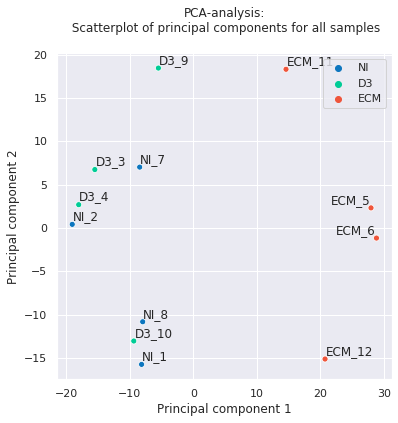

In [47]:
#Plot principal component values per sample

# Initialize graph
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (6, 6))

# Plot graph
sns.scatterplot(x = x, y = y, data = df,
                hue = groups, palette = colors, markers="+")

# Title and axis labels
plt.title("PCA-analysis:\n Scatterplot of principal components for all samples\n",
         fontsize = 12)
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")

#Non-overlapping text using adjustText for matplotlib
#https://github.com/Phlya/adjustText
from adjustText import adjust_text

texts = [plt.text(x[i],
                  y[i],
                  df["group"][i],
                  ha='center',
                  va='center')
         for i in range(len(x))]
adjust_text(texts)

**From the PCA scatterplot, we observe that principal component 1 (PC1) clearly separates mice with experimental cerebral malaria from the other mice. This means that the protein level variation described by principal component 1 is able to strongly separate these groups**

Question 6: Based on the first 2 principal components, are sample D3_3 and D3_4 now still the most similar?

In [48]:
check_answer_module1(question='6', 
                     answer = "")

Not completely correct.
your answer was : 


#### Explained variance graph

As previously mentioned, we can examine the "importance" of the components.

The information about explained variance is stored as the **explained_variance_ratio_** attribute of the **pca** object.

In [49]:
df = df_scaled.copy()
n_components = 12
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(df.T)
principalDf = pd.DataFrame(data = principalComponents)

In [50]:
x.shape, y.shape

((12,), (12,))

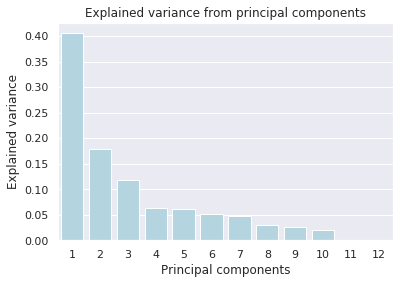

In [51]:
#Define x and y for plot
y = pca.explained_variance_ratio_
x = np.array(list(range(1, len(y) +1)))

#Intitialize plot and labels
fig, ax = plt.subplots()
plt.title("Explained variance from principal components")
ax.set_xlabel("Principal components")
ax.set_ylabel("Explained variance")

#Barplot of principal components
sns.barplot(x, y, color = "lightblue")

We observe that most of the variance is explained by the first principal component (ca 41 %) and second principal component (ca 17 %), adding up to a total of 58 % explained variance.

__Subtask summary:__

So far we:
- Performed principal component analysis
- Shown that the first to principal components well separates the early and late malaria samples

## Differential protein abundance



#### Fold-changes
We wish to compare protein abundance between the non-infected mice and ECM mice. Here we take the mean abundance per group and canclulate an estimated fold change between NI and ECM mice. 

The data is already log2 transformed, we can use standard logarithm math rules. 

log2(a/b) = log2(a) - log2(b)

**Read more on fold-changes in bioinformatics:**
- https://en.wikipedia.org/wiki/Fold_change



In [52]:
df_scaled['NI_mean'] = df_scaled[['NI_1','NI_2','NI_7','NI_8']].mean(axis = 1)
df_scaled['ECM_mean'] = df_scaled[['ECM_5','ECM_6','ECM_11','ECM_12']].mean(axis = 1)
df_scaled['log2FC'] =  df_scaled['ECM_mean'] - df_scaled['NI_mean']

#### T-test and multiple-test corrections using Q-test (Benjamin-Hockberg

Then we perform a simple t-test per protein between the two groups. 

t-test is a parametric statistical test that aims to determine if two mean values are equal. 

**Read more on t-tests in biology:**
- https://www.biologyforlife.com/t-test.html

At a 5% (.05) significance level we can assume 5% false possitives. This is maybe okay when performing one test. But since we perform >700 tests, we can assume > 35 false possitives. This is of course unwanted. To correct for this bias, many statistical methods for multiple testing correction have been developed. 

Here we use a common test called Benjamini-Hochberg correction.
The function takes, all the p-values and returnes adjusted p-values.

**Read more on multiple comparison testing:**
- https://rdrr.io/cran/astrochron/man/multiTest.html
- https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_1215

In [53]:
from scipy.stats import ttest_ind
df_scaled['pvalue'] = df_scaled.apply(lambda row : ttest_ind(row[['NI_1','NI_2','NI_7','NI_8']], 
                     row[['ECM_5','ECM_6','ECM_11','ECM_12']]).pvalue, axis = 1)

from statsmodels.stats.multitest import multipletests
rejectarray, pvals_correctedarray , _, _= multipletests(df_scaled['pvalue'], method = 'fdr_bh')
df_scaled['q_value'] = pvals_correctedarray


df_scaled['log10qvalue'] = -np.log10(df_scaled['q_value'])

#### Finding significantly over and underexpressed proteins

We are interested in finding the most up and downregulated upon disease progression. 

Here we color proteins that are upregulated in red and downregulated in green.

We use log2fc cutoff of 1 (meaning 2-fold increase or decrease) and at the same time only select those with a adjusted p-value (q-value) of less than 5% (0.05) (or in -log10 format > ca 1.3).



In [54]:
np.log10(0.05)

-1.3010299956639813

We will be exploiting booleans, that is, returning a series of True / False status for whether each element in df_proc satisfies our condition.

By running:

np.array(df_proc['log10qvalue'] > -np.log10(0.05))

We identify all rows (proteins) with Q-values below 0.05 as True, and the rest as false. We repeat this for the 3 conditions:
- Significant Q-value?
- Overexpressed (fold-change above 1)?
- Underexpressed (fold-change below -1)?

We can then find proteins that satisfies 2 or multiple of these conditions simply by multiplying them together or running the & operand. Knowing that True = 1, and False = 0, we also know that:
- True * True = True
- True * False = False
- False * False = False

In [55]:
# Exploiting booleans (True / False according to a specific condition)
significant = np.array(df_scaled['log10qvalue'] > -np.log10(0.05))
overexpressed = np.array(df_scaled['log2FC'] > 1)
underexpressed = np.array(df_scaled['log2FC'] < -1)

sum(significant & overexpressed), sum(significant), sum(overexpressed), sum(underexpressed)

(37, 84, 141, 147)

By comparing the mean expression levels of ECM-mice and non-infected mice, we observe:
- 37 proteins are significantly overexpressed
- 84 proteins have a Q-value below 0.05 (in -log10 format)
- 141 proteins are overexpressed (fold change above 1)
- 147 under-expressed (fold change below -1)

Question 7: Using the above logic. How many underexpressed genes are also significant?

In [56]:
check_answer_module1(question='7', 
                     answer = "")

Not completely correct.
your answer was : 


### Volcano plot of significantly over and underexpressed proteins

Let´s graph all our datapoints and mark the proteins which are both significantly different between the two conditions, and have at least a doubling or halving in their expression levels.

Volcanoplots are commonly used visualizations for differential expression om omics data. They are used to visualize a statistical significance (p- or q-values from a statistical test) and magnitude of change (often given as fold-change). 

Read more and see another example of volcano plots at: 
    
https://galaxyproject.github.io/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-volcanoplot/tutorial.html

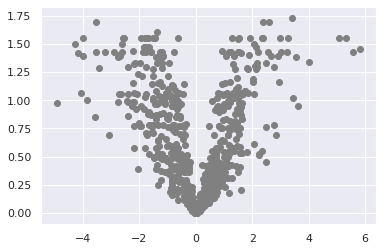

In [57]:
# Plot all points as a volcano plot
data = df_scaled
plt.scatter(x = data['log2FC'], y = data['log10qvalue'], c = "grey")

#### Now let´s color the over and under-expressed proteins, and add some labels and titles!

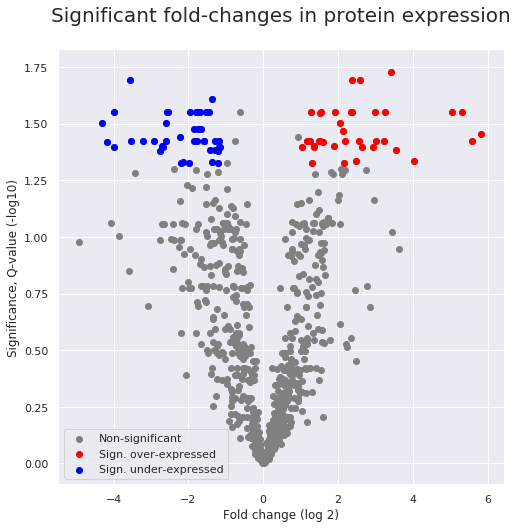

In [58]:
fig, ax = plt.subplots(figsize = (8,8))
sns.set(font_scale = 1)

# Plot all points
data = df_scaled
plt.scatter(x = data['log2FC'], y = data['log10qvalue'], c = "grey")

# Plot significantly overexpressed
data = df_scaled[significant & overexpressed]
plt.scatter(x = data['log2FC'], y = data['log10qvalue'], c = "red")

# Plot significant underexpressed
data = df_scaled[significant & underexpressed]
plt.scatter(x = data['log2FC'], y = data['log10qvalue'], c = "blue")

# Add legend
plt.legend(labels=['Non-significant', 'Sign. over-expressed', 'Sign. under-expressed'])

# Add axis labels and title
plt.title("Significant fold-changes in protein expression\n",
         fontsize = 20)
ax.set_xlabel("Fold change (log 2)")
ax.set_ylabel("Significance, Q-value (-log10)")

# Save plot
plt.savefig("significant_expressed_proteins.png")

## Extracting significantly changed protein names

#### Overexpressed

In [59]:
print("Significant Q-value and fold change above 1:")
print(sum(significant & overexpressed))
print(df_scaled.index.values[significant & overexpressed])

df_scaled[significant & overexpressed][["log2FC", "pvalue", "q_value", "log10qvalue"]]



Significant Q-value and fold change above 1:
37
['P00920' 'P01831'
 'P01896, P01897, P01898, P01899, P06339, P14426, P14432' 'P01897'
 'P01897, P01899' 'P01901, P03991, P04223, P14426, P14428'
 'P01901, P03991, P04223, P14428' 'P01942' 'P01942, P06467' 'P02088'
 'P02088, P02089' 'P02088, P02089, P02104' 'P02089' 'P03991, P14428'
 'P05366' 'P05366, P05367' 'P05367'
 'P05480, P06240, P08103, P39688, Q04736' 'P06745' 'P06800' 'P07356'
 'P07361' 'P0CW03' 'P11835' 'P13634' 'P14824' 'P17182'
 'P17182, P17183, P21550' 'P55258, P61028' 'P60764, P63001, Q05144'
 'P62874, P62880' 'P63242, Q8BGY2' 'P70290' 'Q01853' 'Q61171' 'Q9CYL5'
 'Q9R1P4']


,log2FC,pvalue,q_value,log10qvalue
P00920,3.232546,0.001900,0.037590,1.424926
P01831,2.486730,0.004720,0.046455,1.332969
"P01896, P01897, P01898, P01899, P06339, P14426, P14432",1.545562,0.000768,0.028234,1.549225
P01897,2.374500,0.000109,0.020368,1.691060
"P01897, P01899",2.986548,0.000321,0.028214,1.549532
"P01901, P03991, P04223, P14426, P14428",3.419380,0.000025,0.018748,1.727045
"P01901, P03991, P04223, P14428",1.920298,0.000905,0.028234,1.549225
P01942,3.554038,0.003910,0.041191,1.385200
"P01942, P06467",5.322022,0.000711,0.028234,1.549225
P02088,3.027678,0.002075,0.037590,1.424926


#### Underexpressed

In [60]:
print("Significant Q-value and fold change below -1:")
print(sum(significant & underexpressed))
print(df_scaled.index.values[significant & underexpressed])

df_scaled[significant & underexpressed][["log2FC", "pvalue", "q_value", "log10qvalue"]]

Significant Q-value and fold change below -1:
43
['A2BIM8, B5X0G2, P02762, P04938, P11588'
 'A2BIM8, P02762, P04938, P11588, P11589' 'E9Q414' 'O54890' 'P01878'
 'P06684' 'P06728' 'P07309' 'P07758, P22599, Q00896, Q00897'
 'P07758, P22599, Q00896, Q00897, Q00898' 'P07758, P22599, Q00896, Q00898'
 'P07758, Q00896' 'P07759' 'P07759, P29621'
 'P07759, P29621, Q03734, Q5I2A0, Q91WP6' 'P08226' 'P11589' 'P13020'
 'P22599' 'P22599, Q00896, Q00897' 'P23953' 'P23953, Q8VCT4' 'P26262'
 'P28665' 'P28665, P28666' 'P29699' 'P52430' 'P55065' 'P56400' 'Q00623'
 'Q00724' 'Q00897' 'Q01279' 'Q07968' 'Q61247' 'Q61730' 'Q62351' 'Q64727'
 'Q8BH35' 'Q8BH61' 'Q8BTM8' 'Q8K182' 'Q9JJN5']


,log2FC,pvalue,q_value,log10qvalue
"A2BIM8, B5X0G2, P02762, P04938, P11588",-4.166987,0.002946,0.037990,1.420336
"A2BIM8, P02762, P04938, P11588, P11589",-2.679161,0.003606,0.040279,1.394919
E9Q414,-1.375922,0.000165,0.024635,1.608451
O54890,-1.663172,0.001338,0.033512,1.474804
P01878,-2.746246,0.004122,0.041706,1.379806
P06684,-1.192704,0.002163,0.037590,1.424926
P06728,-3.215700,0.002751,0.037621,1.424574
P07309,-1.987341,0.005150,0.046978,1.328105
"P07758, P22599, Q00896, Q00897",-3.995937,0.000570,0.028214,1.549532
"P07758, P22599, Q00896, Q00897, Q00898",-2.604251,0.002013,0.037590,1.424926


Exercise:
    
Go to [uniprot.org](https://www.uniprot.org) and identify which proteins are over-expresed and under-expressed from their uniprot accession numbers. Do these follow a certain trend, and are the protein level changes expected from what we know of the mice? In other words, do you see biologically significance in the up and downregulated genes?

Exercise: Do you see biologically significance in the up and downregulated genes?

__Final summary:__

Finally we have:
- Imported, processed and generated statistics for dataframes using Pandas
- Performed data normalization, imputing of missing values and transformations
- Visualized dataset distribution using violinplots and heatmaps
- Performed PCA clustering and dimensionality reduction of the data and investigated loadings
- Performed differential expression analysis
- Identified significantly over and under-expressed proteins between non-infected and ECM infected mice